# Trabalho 1
MC920
João Vitor Araki Gonçalves (176353)

## Introdução
O objetivo desse trabalho é analisar o efeito do processo de convolução de diferentes filtros, como um filtro Laplaciano, um filtro passa baixa e os efeitos do filtro de Sobel.
Também será analisado os efeitos da aplicação de um filtro Laplaciano sobre o espectro de Fourrier da imagem.

## O Programa
O programa foi implementado em python 3.7.3 utilizando as seguintes bibliotecas:
* skimage: Leitura e plot das imagens
* matplotlib: Plot das imagens
* numpy: Calculo do DFT das imagens e calculos vetorizados
* opencv2: Convolução e normalização das imagens

### Execução

O programa pode ser executado pela linha de comando: _python main.py_

O programa irá usar a imagem pré definida (butterfly.png) e irá executar os filtros na ordem proposta.
No caso:
1. Laplassiano
2. Passa baixa
3. Sobel vertical
4. Sobel horizontal
5. Sobel combinado
6. Espectro de fourrier da imagem

Então serão exibidos espectros de fourrier filtrados pelo filtro Gaussiano seguidas das imagens resultantes com frequências de corte crescente (10, 20, 30, 40, 50, 60)
    
Todas as imagens utilizadas estão na raiz do projeto, a imagem sendo filtrada pode ser alterada mudando a linha:

`filename = os.path.join('./', 'butterfly.png')`

para utilizar a imagen desejada

## Processo e Resultados

### Leitura da Imagem

A imagem é lida pelo método `skimage.io.imread` que lê a imagem e à guarda uma matriz numpy com valores de 0 à 255 para os níveis de cinza.


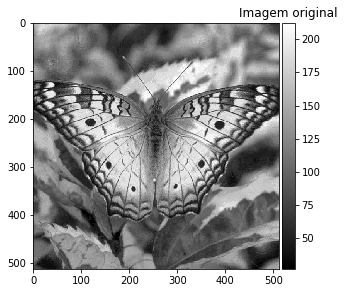

In [9]:
#Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'trab1'))
	print(os.getcwd())
except:
	pass

import cv2
from skimage import io, data_dir
from skimage import data
from skimage import img_as_float
from matplotlib import pyplot as plt
import math
import numpy as np

filename = os.path.join('./', 'butterfly.png')

image = io.imread(filename)
image = image.astype(float)

io.imshow(image.astype(int), cmap='gray')
plt.title("Imagem original")
plt.show()

# The Laplacian of Gaussian
filter_h1 = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
]).astype(float)

filter_h2 = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 4],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]).astype(float) / 256

filter_h3 = np.array([
    [-1, 0 , 1],
    [-2, 0 , 2],
    [-1, 0, 1]
]).astype(float)

filter_h4 = np.array([
    [-1, -2 , -1],
    [0, 0 , 0],
    [1, 2, 1]
]).astype(float)


### Filtragem no domínio espacial

Para a filtragem no domínio espacial, precisamos de kernels para realizar as convoluções na imagem para obter o resultado da filtragem. As diferentes máscaras foram criadas como vetores numpy, como a biblioteca opencv necessita para realizar as convoluções:
Filtro Laplaciano passa alta:

In [2]:
filter_h1

array([[ 0.,  0., -1.,  0.,  0.],
       [ 0., -1., -2., -1.,  0.],
       [-1., -2., 16., -2., -1.],
       [ 0., -1., -2., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.]])

Filtro passa baixa

In [3]:
filter_h2

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.015625  ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

Filtro passa alta de sobel vertical

In [4]:
filter_h3

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]])

Filtro passa alta de sobel horizontal

In [5]:
filter_h4

array([[-1., -2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]])

Para a realização das convoluções, foi utilizado o método `cv2.filter2D`, com parâmetros da imagem, do kernel e -1 para o nível de profundidade para ela ser igual à da imagem original, após cada convolução, foi utilizado o método `cv2.normalize` para normalizar o resultado para o espaço de 0 à 255

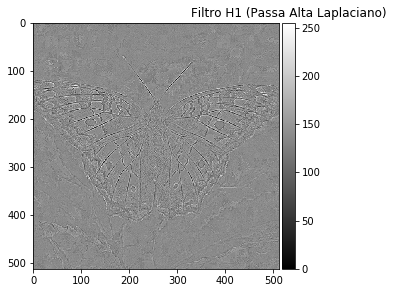

In [6]:
image_h1= cv2.filter2D(image, -1, filter_h1)
cv2.normalize(image_h1, image_h1, 0, 255, cv2.NORM_MINMAX)
io.imshow(image_h1.astype(int), cmap='gray')
plt.title("Filtro H1 (Passa Alta Laplaciano)")
plt.show()

No reultado do primeiro filtro (Laplaciano) é possível observar sua caracterísca de ser bastante sensível a ruídos, mas também é possível perceber um detaque nas bordas da borboleta, que era o efeito esperado de realce de bordas.

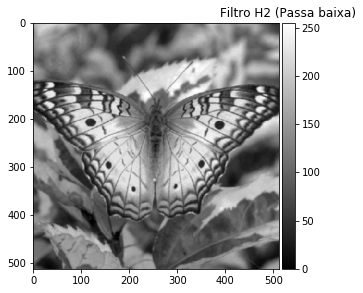

In [7]:
image_h2 = cv2.filter2D(image, -1 ,filter_h2)
cv2.normalize(image_h2, image_h2, 0, 255, cv2.NORM_MINMAX)
io.imshow(image_h2.astype(int), cmap='gray')
plt.title("Filtro H2 (Passa baixa)")
plt.show()

Na execução do filtro passa baixa é possível observar uma clara suavização da imagem, como esperado.

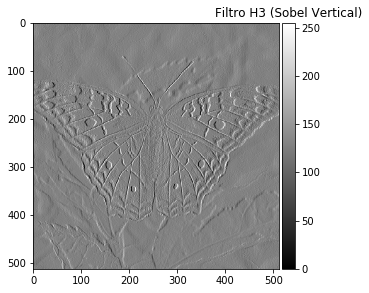

In [10]:
image_h3 = cv2.filter2D(image, -1, filter_h3)
image_h3_normalized = np.copy(image_h3)
cv2.normalize(image_h3, image_h3_normalized, 0, 255, cv2.NORM_MINMAX)
io.imshow(image_h3_normalized.astype(int), cmap='gray')
plt.title("Filtro H3 (Sobel Vertical)")
plt.show()

No resultado do filtro de sobel vertical, é possível notar um destaque nas bordas da esquerda e direita da imagem, ou seja das bordas verticais, como se era esperado.

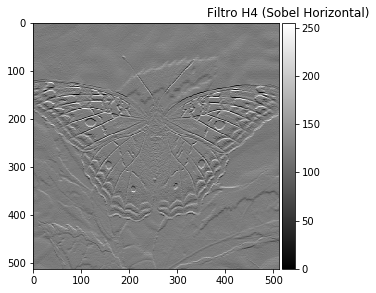

In [11]:
image_h4 = cv2.filter2D(image, -1, filter_h4)
image_h4_normalized = np.copy(image_h4)
cv2.normalize(image_h4, image_h4_normalized, 0, 255, cv2.NORM_MINMAX)
io.imshow(image_h4_normalized.astype(int), cmap='gray')
plt.title("Filtro H4 (Sobel Horizontal)")
plt.show()

No resultado do filtro de sobel vertical, é possível notar um destaque nas bordas superiores e inferiores da imagem, ou seja das bordas horizontais, como se era esperado.

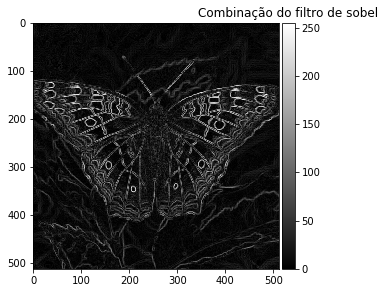

In [20]:
composed = np.sqrt(np.power(image_h3.astype(float), 2) + np.power(image_h4.astype(float), 2))
cv2.normalize(composed, composed, 0, 255, cv2.NORM_MINMAX)
io.imshow(composed.astype(int), cmap='gray')
plt.title("Combinação do filtro de sobel")
plt.show()

A combinação dos resultados do filtro de sobel foi realizada pela expressão nos resultados das filtragens de h3 e h4
$$ \sqrt{h_3^2 + h_4^2} $$
No resultado final, é possível observar um realce de todas as bordas da imagem, que é esperado, já que o filtro de sobel é usualmente utilizado para detecção de bordas.

### Filtragem no Domínio de Frequências

Para realizar filtragens no domínio de frequências, primeiramente precisamos transformar a imagem para o domínio de frequência por meio de uma transformada discreta de fourier (DFT). Para isso foi utilizado o método `np.fft.fft2` e para transladar a componente zero para o centro do espectro, foi utilizado o método `np.fft.fftshift`

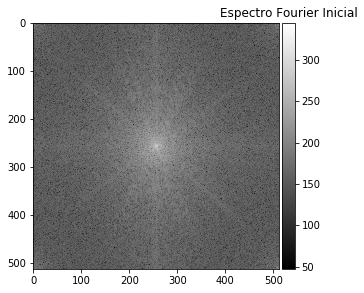

In [22]:

# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
magnitude_spectrum = 20*np.log(np.abs(ftimage))
io.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title("Espectro Fourier Inicial")
plt.show()

Foi criado um filtro gaussiano do tamanho da imagem, e deslocado para o centro do espectro por meio da fórmula

$$\exp{\frac{-(D(u,v) - (\frac{H}{2}, \frac{W}{2}))^{2}}{(2 d_0^{2})}}$$
Subtraindo o valor de D(u,v) pela metade do tamnho da imagem para posicionar o filtro no centro da imagem, onde foi posicionada a componente 0 do espectro de fourier.
Para aplicar o filtro, é aplicado o produto com o espectro de Fourier
$F(u,v)H(u,v)$
Para voltar para o domínio espacial, foi utilizado o método `np.fft.ifft2()` que aplica o DFT inverso, e foi tirado pego o valor absoluto para converter de valores complexos.

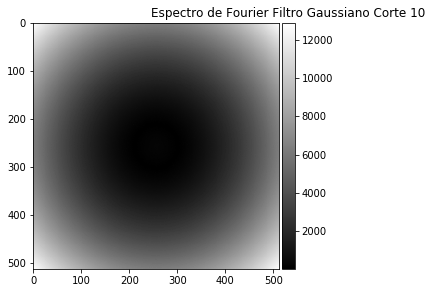

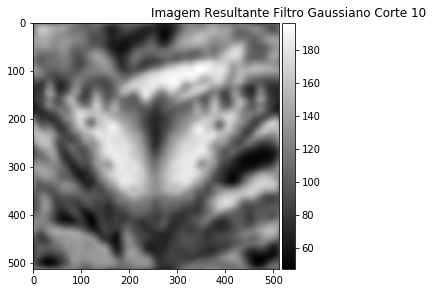

In [24]:
# Build and apply a Gaussian filter.
d0 = 10
nrows = len(image)
ncols = len(image[0])
cy, cx = nrows/2, ncols/2
# Generate the values for u, v
x = np.arange(nrows)
y = np.arange(ncols)
# create a 2D array for the value of u and v for each point
X, Y = np.meshgrid(x, y)
# make an gaussian mask, we subtract X and Y by c, because our fourrier is shifted
# so the origin is no longer in (0,0), so we need to shift the mask to the center
gmask = np.exp(
    (-((X-cx) ** 2) / (2 * (d0 ** 2))) +
    (-((Y-cy) ** 2) / (2 * (d0 ** 2) ))
)
    
ftimagep = ftimage * gmask # apply tha mask
magnitude_spectrum = 20 * np.log(np.abs(ftimagep)) # generate a plottable spectrum
io.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title("Espectro de Fourier Filtro Gaussiano Corte 10")
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
io.imshow(np.abs(imagep), cmap='gray')
plt.title("Imagem Resultante Filtro Gaussiano Corte 10")
plt.show()

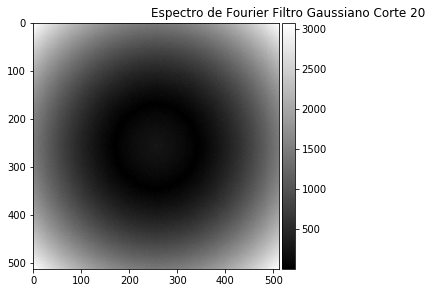

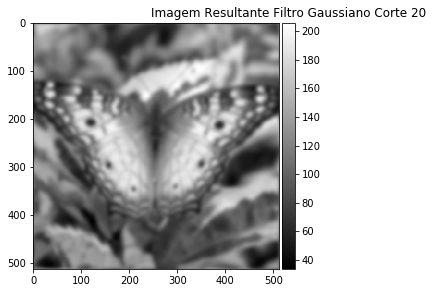

In [25]:
# Build and apply a Gaussian filter.
d0 = 20
nrows = len(image)
ncols = len(image[0])
cy, cx = nrows/2, ncols/2
# Generate the values for u, v
x = np.arange(nrows)
y = np.arange(ncols)
# create a 2D array for the value of u and v for each point
X, Y = np.meshgrid(x, y)
# make an gaussian mask, we subtract X and Y by c, because our fourrier is shifted
# so the origin is no longer in (0,0), so we need to shift the mask to the center
gmask = np.exp(
    (-((X-cx) ** 2) / (2 * (d0 ** 2))) +
    (-((Y-cy) ** 2) / (2 * (d0 ** 2) ))
)
    
ftimagep = ftimage * gmask # apply tha mask
magnitude_spectrum = 20 * np.log(np.abs(ftimagep)) # generate a plottable spectrum
io.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title("Espectro de Fourier Filtro Gaussiano Corte 20")
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
io.imshow(np.abs(imagep), cmap='gray')
plt.title("Imagem Resultante Filtro Gaussiano Corte 20")
plt.show()

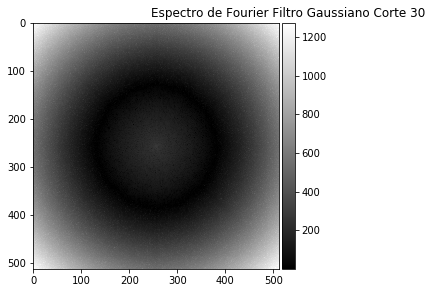

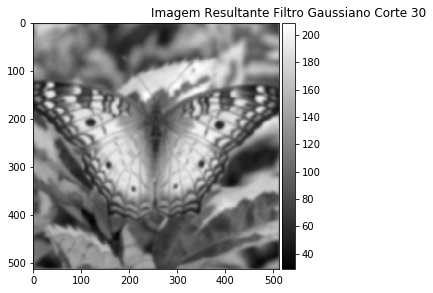

In [26]:
# Build and apply a Gaussian filter.
d0 = 30
nrows = len(image)
ncols = len(image[0])
cy, cx = nrows/2, ncols/2
# Generate the values for u, v
x = np.arange(nrows)
y = np.arange(ncols)
# create a 2D array for the value of u and v for each point
X, Y = np.meshgrid(x, y)
# make an gaussian mask, we subtract X and Y by c, because our fourrier is shifted
# so the origin is no longer in (0,0), so we need to shift the mask to the center
gmask = np.exp(
    (-((X-cx) ** 2) / (2 * (d0 ** 2))) +
    (-((Y-cy) ** 2) / (2 * (d0 ** 2) ))
)
    
ftimagep = ftimage * gmask # apply tha mask
magnitude_spectrum = 20 * np.log(np.abs(ftimagep)) # generate a plottable spectrum
io.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title("Espectro de Fourier Filtro Gaussiano Corte 30")
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
io.imshow(np.abs(imagep), cmap='gray')
plt.title("Imagem Resultante Filtro Gaussiano Corte 30")
plt.show()

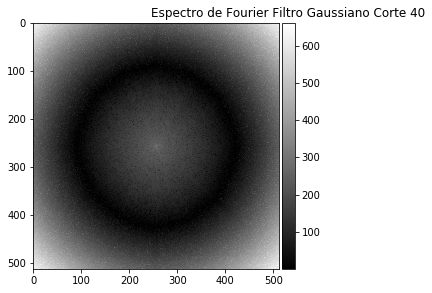

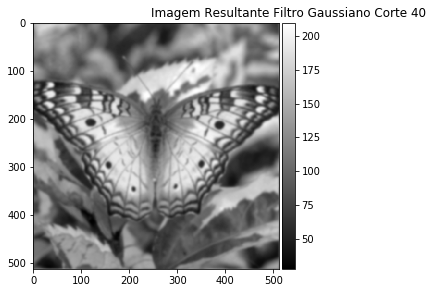

In [27]:
# Build and apply a Gaussian filter.
d0 = 40
nrows = len(image)
ncols = len(image[0])
cy, cx = nrows/2, ncols/2
# Generate the values for u, v
x = np.arange(nrows)
y = np.arange(ncols)
# create a 2D array for the value of u and v for each point
X, Y = np.meshgrid(x, y)
# make an gaussian mask, we subtract X and Y by c, because our fourrier is shifted
# so the origin is no longer in (0,0), so we need to shift the mask to the center
gmask = np.exp(
    (-((X-cx) ** 2) / (2 * (d0 ** 2))) +
    (-((Y-cy) ** 2) / (2 * (d0 ** 2) ))
)
    
ftimagep = ftimage * gmask # apply tha mask
magnitude_spectrum = 20 * np.log(np.abs(ftimagep)) # generate a plottable spectrum
io.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title("Espectro de Fourier Filtro Gaussiano Corte 40")
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
io.imshow(np.abs(imagep), cmap='gray')
plt.title("Imagem Resultante Filtro Gaussiano Corte 40")
plt.show()

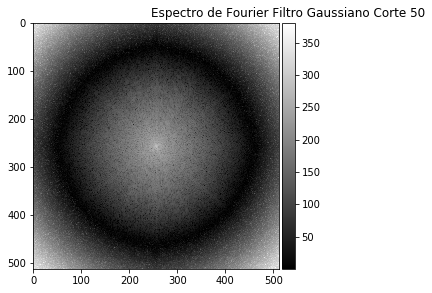

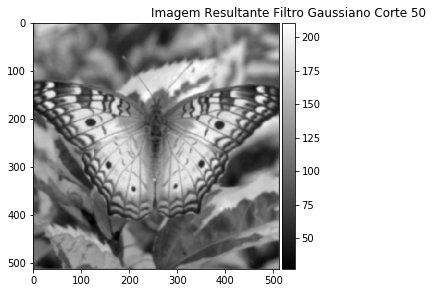

In [28]:
# Build and apply a Gaussian filter.
d0 = 50
nrows = len(image)
ncols = len(image[0])
cy, cx = nrows/2, ncols/2
# Generate the values for u, v
x = np.arange(nrows)
y = np.arange(ncols)
# create a 2D array for the value of u and v for each point
X, Y = np.meshgrid(x, y)
# make an gaussian mask, we subtract X and Y by c, because our fourrier is shifted
# so the origin is no longer in (0,0), so we need to shift the mask to the center
gmask = np.exp(
    (-((X-cx) ** 2) / (2 * (d0 ** 2))) +
    (-((Y-cy) ** 2) / (2 * (d0 ** 2) ))
)
    
ftimagep = ftimage * gmask # apply tha mask
magnitude_spectrum = 20 * np.log(np.abs(ftimagep)) # generate a plottable spectrum
io.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title("Espectro de Fourier Filtro Gaussiano Corte 50")
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
io.imshow(np.abs(imagep), cmap='gray')
plt.title("Imagem Resultante Filtro Gaussiano Corte 50")
plt.show()

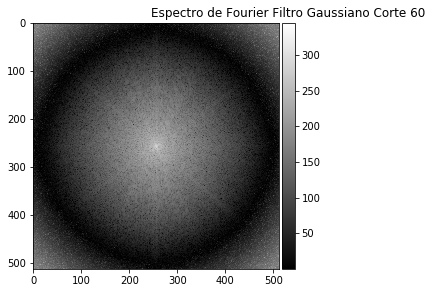

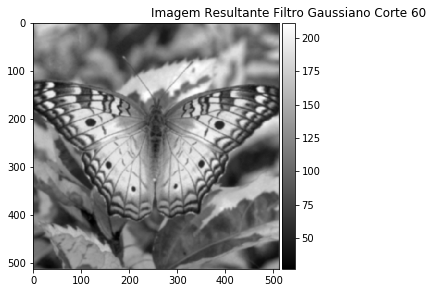

In [29]:
# Build and apply a Gaussian filter.
d0 = 60
nrows = len(image)
ncols = len(image[0])
cy, cx = nrows/2, ncols/2
# Generate the values for u, v
x = np.arange(nrows)
y = np.arange(ncols)
# create a 2D array for the value of u and v for each point
X, Y = np.meshgrid(x, y)
# make an gaussian mask, we subtract X and Y by c, because our fourrier is shifted
# so the origin is no longer in (0,0), so we need to shift the mask to the center
gmask = np.exp(
    (-((X-cx) ** 2) / (2 * (d0 ** 2))) +
    (-((Y-cy) ** 2) / (2 * (d0 ** 2) ))
)
    
ftimagep = ftimage * gmask # apply tha mask
magnitude_spectrum = 20 * np.log(np.abs(ftimagep)) # generate a plottable spectrum
io.imshow(np.abs(magnitude_spectrum), cmap='gray')
plt.title("Espectro de Fourier Filtro Gaussiano Corte 60")
plt.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
io.imshow(np.abs(imagep), cmap='gray')
plt.title("Imagem Resultante Filtro Gaussiano Corte 60")
plt.show()

Como é possível observar dos resultados, quanto maior é a frequência de corte $D_0$, menos das altas frequências do espectro são removídas, portanto menor é o grau de suavização. Portanto podemos observar que a imagem se torna cada vez mais nítida conforme o valor de $D_0$ aumenta.

## Conclusão
Nesse trabalho aprendemos o efeito de diferentes tipos de filtragem, tanto em domínio espacial quanto no domínio de frequências. Pudemos verificar o efeito de suavização do filtro Gaussiano, a sensibilidade à ruídos do filtro Laplaciano e a propriedade de identificação de bordas do filtro de Sobel.